In [3]:
#import some packages you will be using
import pandas as pd 
import numpy as np 
import statsmodels.api as sm
import statsmodels.formula.api as smf  
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import linear_model, metrics
#added this due to an error with cleaning
pd.options.mode.chained_assignment = None

In [4]:
get_ipython().magic(u'matplotlib inline')
 
#set some options for the output
pd.set_option('display.notebook_repr_html', False) 
pd.set_option('display.max_columns', 40) 
pd.set_option('display.max_rows', 10) 
pd.set_option('display.width', 120)


In [5]:
#read in the datasets
train = pd.read_csv('AMES_TRAIN.csv')
test = pd.read_csv('AMES_TEST_SFAM.csv')
#print(train)
#Converted all variable names to lower case
train.columns = [s.lower() for s in train.columns]
test.columns = [s.lower() for s in test.columns]
print(train.shape)

(2039, 81)


In [6]:
#fixes to data to account for missing values
#train['totalbsmtsf']=train['totalbsmtsf'].replace(0,train['totalbsmtsf'].mean())
#train['grlivarea']=train['grlivarea'].replace(0,train['grlivarea'].mean())
#train.to_csv('fixes.csv')

In [23]:
#making new variables and looks out of order but done after the plots were done below.
newtrain_2 = train
newtrain_2['totalsf'] = (newtrain_2['totalbsmtsf']+newtrain_2['grlivarea']+newtrain_2['garagearea'])
newtrain_2.describe
newtrain_2 = newtrain_2[newtrain_2['totalsf'] < 7000]
newtrain_3 = newtrain_2
newtrain_3 = newtrain_3[newtrain_3['salecondition'] == 'Normal']
#newtrain_3 = newtrain_3[newtrain_3['saleprice'] <= 550000]
newtest_2 = test
newtest_2["garagearea"] = newtest_2['garagearea'].fillna(0)
newtest_2['totalsf'] = (newtest_2['totalbsmtsf']+newtest_2['grlivarea']+newtest_2['garagearea'])


In [24]:
#investigating missing values
pd.set_option('display.max_rows', -1)
newtrain_3.isnull().sum().sort_values(ascending=False)

                 1672
poolqc           1607
miscfeature      1568
alley            1330
fence             837
fireplacequ       294
lotfrontage        87
garageyrblt        87
garagequal         87
garagecond         87
garagefinish       86
garagetype         49
bsmtexposure       47
bsmtqual           47
bsmtfintype2       47
bsmtcond           47
bsmtfintype1        7
masvnrarea          7
masvnrtype          1
electrical          1
bsmtfullbath        1
bsmthalfbath        0
exterior1           0
roofmat             0
exterqual           0
exterior2           0
yearremodel         0
extercond           0
foundation          0
roofstyle           0
totalsf             0
yearbuilt           0
lotconfig           0
zoning              0
lotarea             0
street              0
lotshape            0
landcontour         0
utilities           0
landslope           0
overallcond         0
neighborhood        0
condition1          0
condition2          0
bldgtype            0
housestyle

               1.000000
saleprice      0.857188
totalsf        0.793854
overallqual    0.738296
grlivarea      0.638423
garagecars     0.637966
firstflrsf     0.636748
totalbsmtsf    0.628665
garagearea     0.857188
totalsf        0.793854
overallqual    0.738296
grlivarea      0.638423
garagecars     0.637966
firstflrsf     0.636748
totalbsmtsf    0.628665
garagearea       ...   
fullbath       0.541884
Name: saleprice, Length: 9, dtype: float64


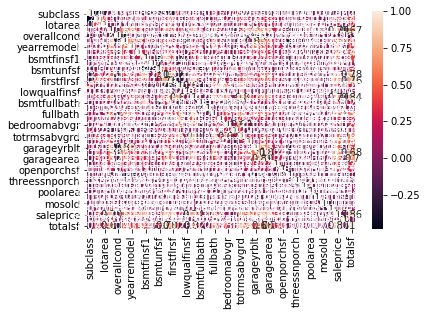

In [25]:
corr = newtrain_3[newtrain_3.columns].corr()
#print(corr)
sns.heatmap(corr, annot = True)
print(corr['saleprice'].sort_values(ascending=False).head(9))
corr.to_csv('traincorrelations.csv') 

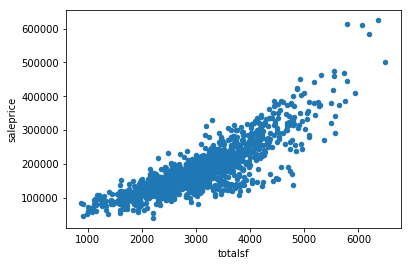

In [29]:
newtrain_3.plot.scatter(y='saleprice', x='totalsf')

In [27]:
#Run a simple model
model = smf.ols(formula='saleprice ~ totalsf' , data=newtrain_3).fit()  
  
print (model.summary())
print(model.params)

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     4646.
Date:                Sun, 10 Feb 2019   Prob (F-statistic):               0.00
Time:                        00:08:29   Log-Likelihood:                -20002.
No. Observations:                1679   AIC:                         4.001e+04
Df Residuals:                    1677   BIC:                         4.002e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.147e+04   3139.715    -10.023      0.0

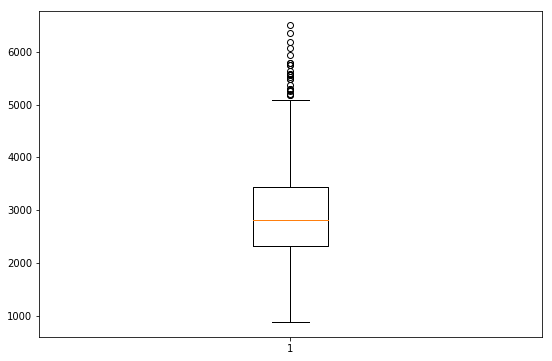

In [28]:
data_to_plot = newtrain_3['totalsf']
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')

In [256]:
#Convert the array predictions to a data frame then merge with the index for the test data to create your file
test_predictions_9 = model.predict(newtest_2)
print(test_predictions_9)
d_2 = {'p_saleprice': test_predictions_9}
df3 = newtest_2[['index']]
df4 = pd.DataFrame(data=d_2)
your_file = pd.concat([df3,df4],axis = 1, join_axes=[df3.index])
print(your_file)
#Submit your file as csv using the following code to save on your computer
#You will have to delete the first column in the csv file to submit to kaggle 
your_file.to_csv('LoganStrouse_predict_totalsf_3.csv')

        19643.046249
0      262229.224810
1      186789.129974
2      239793.508874
3      183914.553870
4      232081.231520
5      111278.923526
6      137921.336201
7      236638.486320
8      128386.156928
9      118570.531206
10     154748.123153
11     182231.875175
12     305628.312824
13     234114.468277
14     200811.452434
15     191977.389284
16     295392.017428
17      71455.527740
18     124600.129864
19     218479.578734
20     360455.593643
21     119972.763452
22     219881.810980
23     279476.681436
24     109105.463545
25     112751.267385
26     121655.442147
27     190364.822202
28     238321.165015
29     225350.516740
30     266085.363486
31     166526.874019
32     153626.337356
33     177744.731987
34     218129.020673
35     142688.925837
36     182161.763562
37     133574.416238
38     135958.211056
39     118710.754430
40     180899.754541
41     273587.306002
42      72577.313536
43     261528.108687
44     166807.320469
45     224228.730943
46     136238

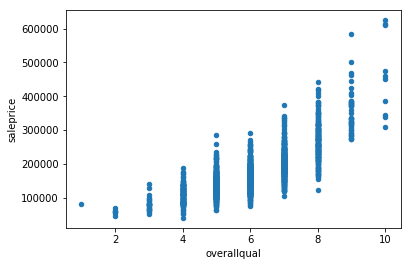

In [257]:
newtrain_3.plot.scatter(y='saleprice', x='overallqual', s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, 
linewidths=None, verts=None, edgecolors=None )

In [258]:
#Run a simple model
model_2 = smf.ols(formula='saleprice ~ overallqual' , data=newtrain_3).fit()  
  
print (model_2.summary())
print (model_2.params)

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     2858.
Date:                Thu, 24 Jan 2019   Prob (F-statistic):               0.00
Time:                        02:52:40   Log-Likelihood:                -20281.
No. Observations:                1679   AIC:                         4.057e+04
Df Residuals:                    1677   BIC:                         4.058e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -7.552e+04   4780.874    -15.797      

In [259]:
#Convert the array predictions to a data frame then merge with the index for the test data to create your file
test_predictions_9 = model.predict(newtest_2)
print(test_predictions_9)
d_2 = {'p_saleprice': test_predictions_9}
df3 = newtest_2[['index']]
df4 = pd.DataFrame(data=d_2)
your_file = pd.concat([df3,df4],axis = 1, join_axes=[df3.index])
print(your_file)
#Submit your file as csv using the following code to save on your computer
#You will have to delete the first column in the csv file to submit to kaggle 
your_file.to_csv('LoganStrouse_predict_overallqual_3.csv') 

        19643.046249
0      262229.224810
1      186789.129974
2      239793.508874
3      183914.553870
4      232081.231520
5      111278.923526
6      137921.336201
7      236638.486320
8      128386.156928
9      118570.531206
10     154748.123153
11     182231.875175
12     305628.312824
13     234114.468277
14     200811.452434
15     191977.389284
16     295392.017428
17      71455.527740
18     124600.129864
19     218479.578734
20     360455.593643
21     119972.763452
22     219881.810980
23     279476.681436
24     109105.463545
25     112751.267385
26     121655.442147
27     190364.822202
28     238321.165015
29     225350.516740
30     266085.363486
31     166526.874019
32     153626.337356
33     177744.731987
34     218129.020673
35     142688.925837
36     182161.763562
37     133574.416238
38     135958.211056
39     118710.754430
40     180899.754541
41     273587.306002
42      72577.313536
43     261528.108687
44     166807.320469
45     224228.730943
46     136238